# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [ ]:
!rm -r sample_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip ./drive/MyDrive/new-currency-dataset.zip

Archive:  ./drive/MyDrive/new-currency-dataset.zip
   creating: new-currency-dataset/
   creating: new-currency-dataset/test/
   creating: new-currency-dataset/test/fake/
   creating: new-currency-dataset/test/fake/100/
  inflating: new-currency-dataset/test/fake/100/cbc7cb3a5001691c3635bf8d87a350af.jpg  
 extracting: new-currency-dataset/test/fake/100/cc6c0391be8bfbbdc771e234cb70838d.jpg  
 extracting: new-currency-dataset/test/fake/100/ccaf8ec2ef5b3c2b92cbcce93683bbe2.jpg  
 extracting: new-currency-dataset/test/fake/100/cd83222e9b9994fcfe9ab186555ea234.jpg  
 extracting: new-currency-dataset/test/fake/100/ceb8d36e618f900efa13fc21fef54a9a.jpg  
  inflating: new-currency-dataset/test/fake/100/d0d4cbbe6426d22b72c4d140d85260ef.jpg  
 extracting: new-currency-dataset/test/fake/100/d1ede28079d18c3e5cbd348d3dc6d956.jpg  
 extracting: new-currency-dataset/test/fake/100/d3d8a56ae5eef92cc1e9062a8e2c2c4a.jpg  
 extracting: new-currency-dataset/test/fake/100/d5b4068f42571b4cce44d6f5cf197c4a.jpg

In [ ]:
import tensorflow as tf
import os

In [ ]:
import warnings
warnings.filterwarnings("ignore") 
import shutil
import glob

SPLITS=["train","test"]
CLASS=["fake","original"]
ORG_DIR="/content/new-currency-dataset/" 
DES_DIR="/content/data/"
TRAIN_DIR=DES_DIR+"train/"
TEST_DIR=DES_DIR+"test/"
i=1;
for d in SPLITS: 
  for c in CLASS:
   destination_dir=os.path.join(DES_DIR,c) 
   current_dir=os.path.join(ORG_DIR,d)
   current_dir=os.path.join(current_dir,c) 
   if(not os.path.exists(destination_dir)):
     os.makedirs(destination_dir)
   for denomination in os.listdir(current_dir):
      denomination_dir=os.path.join(current_dir,denomination) 
      # print(denomination_dir)
      for img_path in glob.glob(os.path.join(denomination_dir,"*")):
        temp=denomination_dir+"/"+c+"_"+str(i)+".jpg"
        # print(temp)
        os.rename(img_path,temp)
        i+=1;
        shutil.copy(temp,destination_dir) 
      break

In [ ]:
IMAGE_SIZE=(512,720)
IMAGE_SIZE_WITH_CHANNEL=(512,720,3)

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'data' 

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data',image_size=IMAGE_SIZE,batch_size=16)

Found 504 files belonging to 2 classes.


In [ ]:
len(data)

32

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

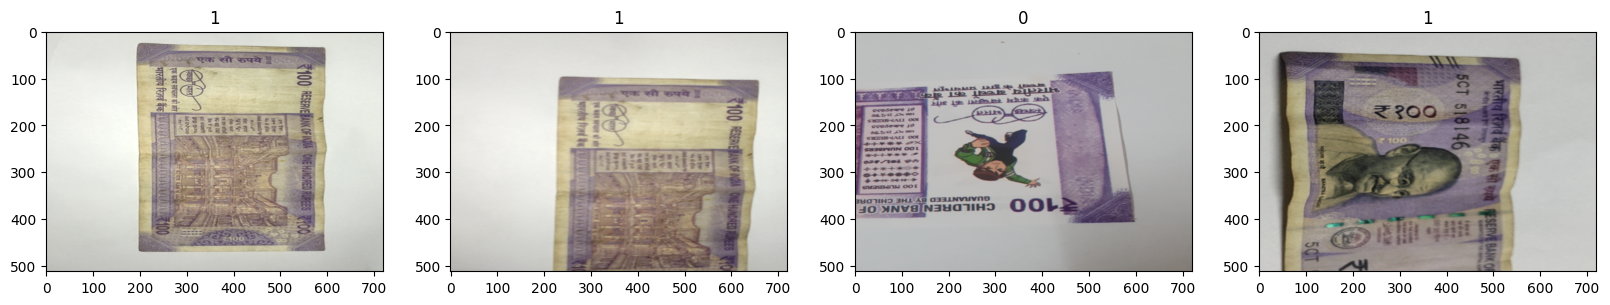

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

23

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train),len(val),len(test)

(23, 6, 3)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 512, 720, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=IMAGE_SIZE_WITH_CHANNEL))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 718, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 359, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 357, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 178, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 176, 16)      4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 88, 16)       0

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 32s 659ms/step - loss: 1.6751 - accuracy: 0.5924 - val_loss: 0.6781 - val_accuracy: 0.7812
Epoch 2/20
23/23 [==============================] - 17s 672ms/step - loss: 0.6044 - accuracy: 0.6005 - val_loss: 0.5336 - val_accuracy: 0.6562
Epoch 3/20
23/23 [==============================] - 20s 804ms/step - loss: 0.4683 - accuracy: 0.8315 - val_loss: 0.3656 - val_accuracy: 0.9479
Epoch 4/20
23/23 [==============================] - 19s 759ms/step - loss: 0.3717 - accuracy: 0.8668 - val_loss: 0.3436 - val_accuracy: 0.8750
Epoch 5/20
23/23 [==============================] - 20s 800ms/step - loss: 0.3038 - accuracy: 0.9511 - val_loss: 0.3186 - val_accuracy: 0.9479
Epoch 6/20
23/23 [==============================] - 18s 721ms/step - loss: 0.2089 - accuracy: 0.9538 - val_loss: 0.3681 - val_accuracy: 0.8125
Epoch 7/20
23/23 [==============================] - 17s 669ms/step - loss: 0.1231 - accuracy: 0.9565 - val_loss: 0.0713 - val_accuracy: 0.9896

# 8. Plot Performance

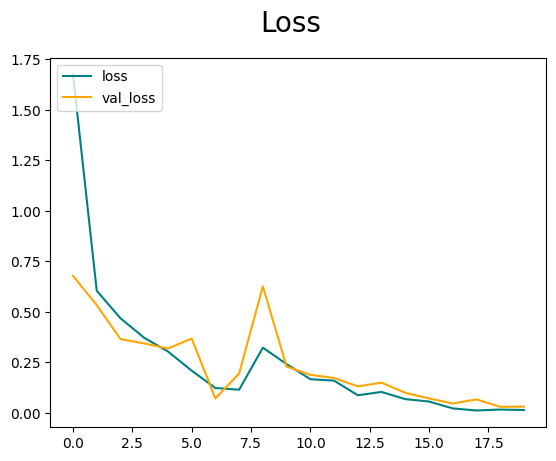

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

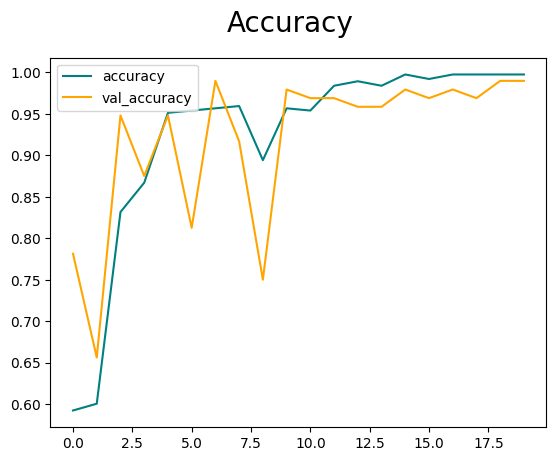

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.math import confusion_matrix 

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
actual=[]
predicted=[]

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)   
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat) 
    #for confusion matrix
    for i in y:
      actual.append(i)
    for i in yhat:
      predicted.append(int(round(i[0])))

1/1 [==============================] - 0s 46ms/step


In [ ]:
print(len(actual))
print(len(predicted))

40
40


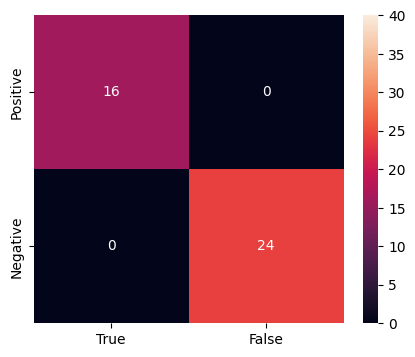

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
confusionMatrix=confusion_matrix(actual,predicted) 
df_cm = pd.DataFrame(confusionMatrix, index = ["Positive","Negative"],
                  columns = ["True","False"])
plt.figure(figsize = (5,4));
sn.heatmap(df_cm,annot=True,vmax=len(predicted));

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

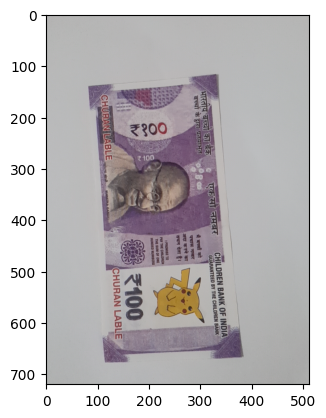

In [ ]:
img = cv2.imread('temp.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

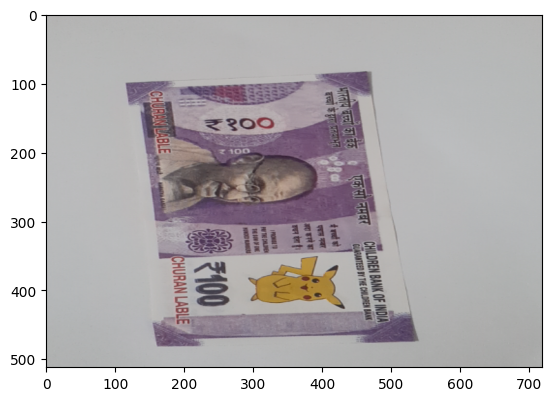

In [ ]:
resize = tf.image.resize(img, IMAGE_SIZE)
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [ ]:
yhat

array([[0.00044906]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Original')
else:
    print(f'Predicted class is Fake')

Predicted class is Fake


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('drive','MyDrive','model','imageclassifier.h5'))

In [ ]:
new_model = load_model('models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 69ms/step


array([[0.00044906]], dtype=float32)

To save and load the history of the training

In [ ]:
import pickle

with open('./trainHistoryDict', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)

In [ ]:
with open('./trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)
    print(history)

{'loss': [1.6751328706741333, 0.6044020652770996, 0.46826276183128357, 0.37166741490364075, 0.30377840995788574, 0.20890775322914124, 0.12306586652994156, 0.11473660916090012, 0.32268035411834717, 0.24141275882720947, 0.16667123138904572, 0.15962114930152893, 0.0871712937951088, 0.10357522964477539, 0.06797508895397186, 0.05617823824286461, 0.0220643337816, 0.011791110038757324, 0.016407959163188934, 0.01415795087814331], 'accuracy': [0.592391312122345, 0.6005434989929199, 0.83152174949646, 0.866847813129425, 0.9510869383811951, 0.9538043737411499, 0.95652174949646, 0.95923912525177, 0.89402174949646, 0.95652174949646, 0.9538043737411499, 0.9836956262588501, 0.989130437374115, 0.9836956262588501, 0.9972826242446899, 0.991847813129425, 0.9972826242446899, 0.9972826242446899, 0.9972826242446899, 0.9972826242446899], 'val_loss': [0.6781492233276367, 0.5335800051689148, 0.3655800521373749, 0.34359443187713623, 0.31858083605766296, 0.36806419491767883, 0.07127987593412399, 0.194957509636878